In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart_disease_uci.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
df.shape

(920, 16)

In [10]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


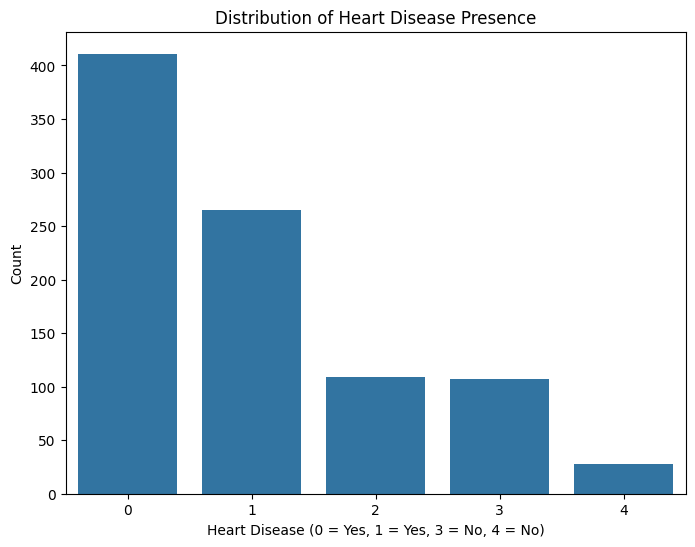

In [13]:
target_distribution = df['num'].value_counts(normalize=True) * 100
print(target_distribution)
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df)
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Heart Disease (0 = Yes, 1 = Yes, 3 = No, 4 = No)')
plt.ylabel('Count')
plt.show()


In [14]:

heart_disease_counts = df['num'].value_counts()
heart_disease_counts


,count
num,
0,411
1,265
2,109
3,107
4,28


In [15]:
print(f"Minimum age: {df['age'].min()}")
print(f"Maximum age: {df['age'].max()}")


Minimum age: 28
Maximum age: 77


sex
Male      78.913043
Female    21.086957
Name: proportion, dtype: float64


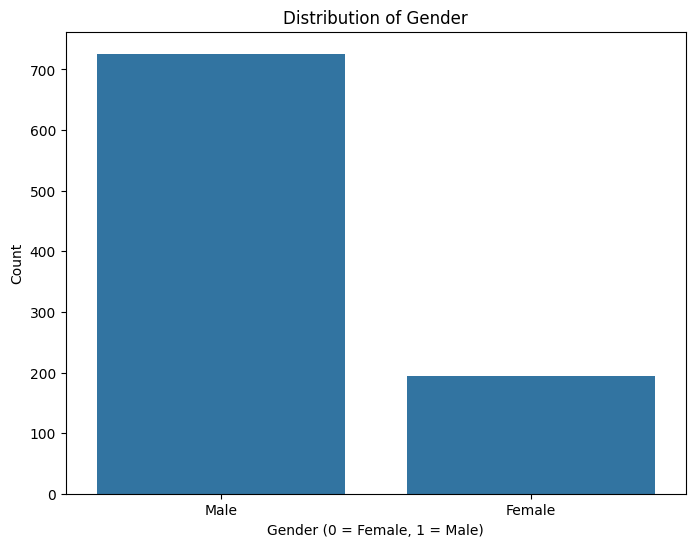

In [16]:
gender_distribution = df['sex'].value_counts(normalize=True) * 100
print(gender_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


In [21]:
df_sex = df["sex"]
df_sex.value_counts()

,count
sex,
Male,726
Female,194


In [19]:
print(f"Average of blood pressure (trestbps): {df['trestbps'].mean()}")
print(f"Median of blood pressure (trestbps): {df['trestbps'].median()}")

print(f"Average of serum cholesterol (chol): {df['chol'].mean()}")
print(f"Median of serum cholesterol (chol): {df['chol'].median()}")

print(f"Average maximum heart rate (thalch): {df['thalch'].mean()}")
print(f"Median maximum heart rate (thalch): {df['thalch'].median()}")


Average resting blood pressure (trestbps): 131.99565217391304
Median resting blood pressure (trestbps): 130.0
Average serum cholesterol (chol): 199.90869565217392
Median serum cholesterol (chol): 223.0
Average maximum heart rate (thalch): 137.5456647398844
Median maximum heart rate (thalch): 138.0


In [22]:
exang_counts = df['exang'].value_counts()
print(exang_counts)

num_exang_patients = exang_counts.get(1, 0)
print(f"\nNumber of patients with exercise-induced angina: {num_exang_patients}")


exang
False    528
True     337
False     55
Name: count, dtype: int64

Number of patients with exercise-induced angina: 337


<ipython-input-22-3d8a12b4197b>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_exang_patients = exang_counts.get(1, 0)


In [23]:
chest_pain_counts = df['cp'].value_counts()
chest_pain_counts


,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


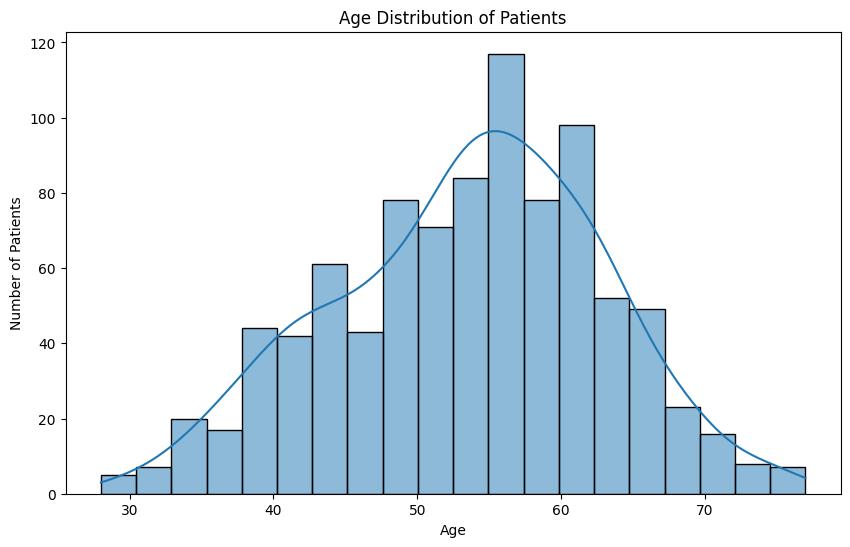

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

In [25]:
average_cholesterol_by_disease = df.groupby('num')['chol'].mean()

average_cholesterol_by_disease


,chol
num,
0,227.678832
1,195.988679
2,145.311927
3,160.308411
4,193.250000


In [27]:
Q1_chol = df['chol'].quantile(0.25)
Q3_chol = df['chol'].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol
lower_bound_chol = Q1_chol - 1.5 * IQR_chol
upper_bound_chol = Q3_chol + 1.5 * IQR_chol
chol_outliers = df[(df['chol'] < lower_bound_chol) | (df['chol'] > upper_bound_chol)]
print(f"Number of cholesterol outliers: {len(chol_outliers)}")
print("Cholesterol Outliers:")
print(chol_outliers[['chol']])
Q1_trestbps = df['trestbps'].quantile(0.25)
Q3_trestbps = df['trestbps'].quantile(0.75)
IQR_trestbps = Q3_trestbps - Q1_trestbps
lower_bound_trestbps = Q1_trestbps - 1.5 * IQR_trestbps
upper_bound_trestbps = Q3_trestbps + 1.5 * IQR_trestbps
trestbps_outliers = df[(df['trestbps'] < lower_bound_trestbps) | (df['trestbps'] > upper_bound_trestbps)]
print(f"\nNumber of resting blood pressure outliers: {len(trestbps_outliers)}")
print("Resting Blood Pressure Outliers:")
print(trestbps_outliers[['trestbps']])


Number of cholesterol outliers: 185
Cholesterol Outliers:
      chol
48   417.0
121  407.0
152  564.0
181  409.0
373  412.0
..     ...
818    0.0
819    0.0
822    0.0
839    0.0
840    0.0

[185 rows x 1 columns]

Number of resting blood pressure outliers: 28
Resting Blood Pressure Outliers:
     trestbps
14      172.0
83      180.0
126     200.0
172     174.0
183     178.0
188     192.0
201     180.0
213     178.0
231     180.0
338     190.0
375     180.0
387     180.0
475     180.0
484     180.0
548     200.0
569     180.0
595     180.0
644      80.0
647     180.0
680     200.0
700     185.0
701     200.0
727     180.0
753       0.0
779     178.0
854     172.0
889     180.0
896     190.0


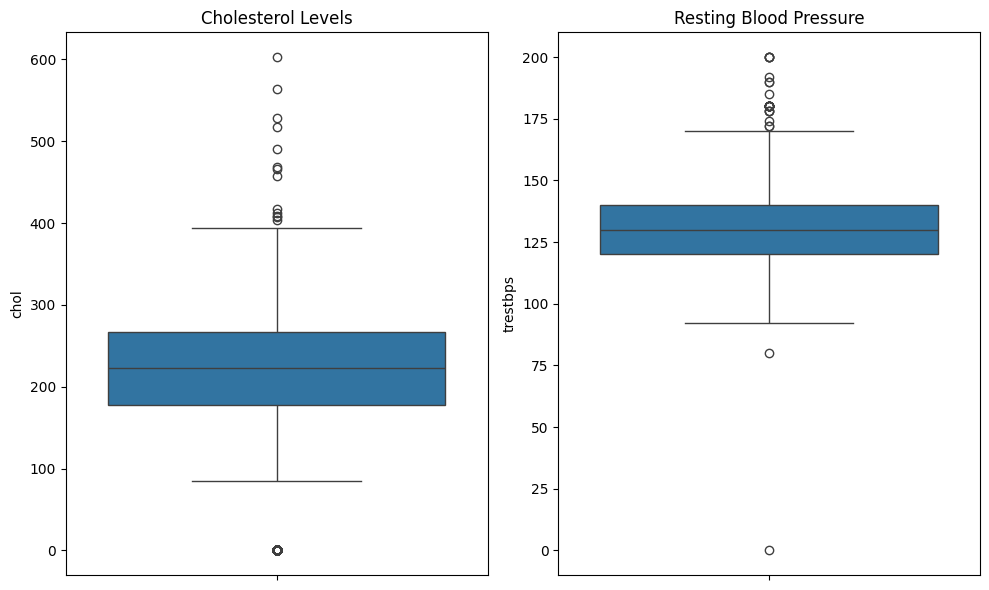

In [29]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['chol'])
plt.title('Cholesterol Levels')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['trestbps'])
plt.title('Resting Blood Pressure')
plt.tight_layout()
plt.show()


**THANK YOU**

